In [15]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [18]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [19]:
%ls ./plot_gtm_5000

gene_Atf4_biallelic.npy  gene_Atf4_cast.npy      gene_Fos_c57.npy
gene_Atf4_c57.npy        gene_Fos_biallelic.npy  gene_Fos_cast.npy


In [20]:
%pwd

'/home/anna/Documents/research_projects/transcriptional_bursting'

In [21]:
df = npy2df('./plot_gtm_5000/gene_Atf4_c57.npy')
df

,kon,ron,koff,roff,mu,delta,dist
0,3.788040,5.919323,4.775216,5.699556,75.366768,1.0,0.074222
1,4.769081,7.679894,6.804184,13.002615,107.020550,1.0,0.193985
2,12.902177,14.506650,6.591329,4.399678,60.407048,1.0,0.178691
3,1.788051,4.997635,3.673139,11.035631,100.479211,1.0,0.165125
4,14.071712,17.933213,7.303860,7.767868,86.055183,1.0,0.126223
...,...,...,...,...,...,...,...
4995,0.784302,6.303757,0.869124,4.589744,63.824660,1.0,0.485203
4996,6.044184,12.015186,2.331438,6.184634,109.790673,1.0,0.360919
4997,12.902177,14.506650,6.591329,4.399678,60.407048,1.0,0.178691
4998,13.675142,16.764259,3.913265,2.570942,72.560917,1.0,0.137701


In [22]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [23]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,3.788040,5.919323,4.775216,5.699556,75.366768,1.0,0.074222,0.639945,0.837822,0.676697,63.143965
1,4.769081,7.679894,6.804184,13.002615,107.020550,1.0,0.193985,0.620983,0.523293,0.873915,56.003158
2,12.902177,14.506650,6.591329,4.399678,60.407048,1.0,0.178691,0.889397,1.498139,0.418842,90.498153
3,1.788051,4.997635,3.673139,11.035631,100.479211,1.0,0.165125,0.357779,0.332844,1.447968,33.443865
4,14.071712,17.933213,7.303860,7.767868,86.055183,1.0,0.126223,0.784673,0.940266,0.579731,80.914735
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.784302,6.303757,0.869124,4.589744,63.824660,1.0,0.485203,0.124418,0.189362,3.186942,12.085983
4996,6.044184,12.015186,2.331438,6.184634,109.790673,1.0,0.360919,0.503045,0.376973,1.136340,41.388084
4997,12.902177,14.506650,6.591329,4.399678,60.407048,1.0,0.178691,0.889397,1.498139,0.418842,90.498153
4998,13.675142,16.764259,3.913265,2.570942,72.560917,1.0,0.137701,0.815732,1.522113,0.427744,110.445937


In [24]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [25]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [26]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde="density_kernel"):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [27]:
best_parameters(df)

1738

In [28]:
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs,log_kon,log_koff,log_bs,log_bf,density_kernel
0,3.788040,5.919323,4.775216,5.699556,75.366768,1.0,0.074222,0.639945,0.837822,0.676697,63.143965,0.578415,0.678993,1.800332,-0.169606,0.034877
1,4.769081,7.679894,6.804184,13.002615,107.020550,1.0,0.193985,0.620983,0.523293,0.873915,56.003158,0.678435,0.832776,1.748213,-0.058531,0.041489
2,12.902177,14.506650,6.591329,4.399678,60.407048,1.0,0.178691,0.889397,1.498139,0.418842,90.498153,1.110663,0.818973,1.956640,-0.377950,0.064161
3,1.788051,4.997635,3.673139,11.035631,100.479211,1.0,0.165125,0.357779,0.332844,1.447968,33.443865,0.252380,0.565037,1.524316,0.160759,0.006787
4,14.071712,17.933213,7.303860,7.767868,86.055183,1.0,0.126223,0.784673,0.940266,0.579731,80.914735,1.148347,0.863552,1.908028,-0.236774,0.037336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.784302,6.303757,0.869124,4.589744,63.824660,1.0,0.485203,0.124418,0.189362,3.186942,12.085983,-0.105517,-0.060918,1.082282,0.503374,0.000694
4996,6.044184,12.015186,2.331438,6.184634,109.790673,1.0,0.360919,0.503045,0.376973,1.136340,41.388084,0.781338,0.367624,1.616875,0.055508,0.014951
4997,12.902177,14.506650,6.591329,4.399678,60.407048,1.0,0.178691,0.889397,1.498139,0.418842,90.498153,1.110663,0.818973,1.956640,-0.377950,0.064161
4998,13.675142,16.764259,3.913265,2.570942,72.560917,1.0,0.137701,0.815732,1.522113,0.427744,110.445937,1.135932,0.592539,2.043150,-0.368816,0.007547


In [29]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

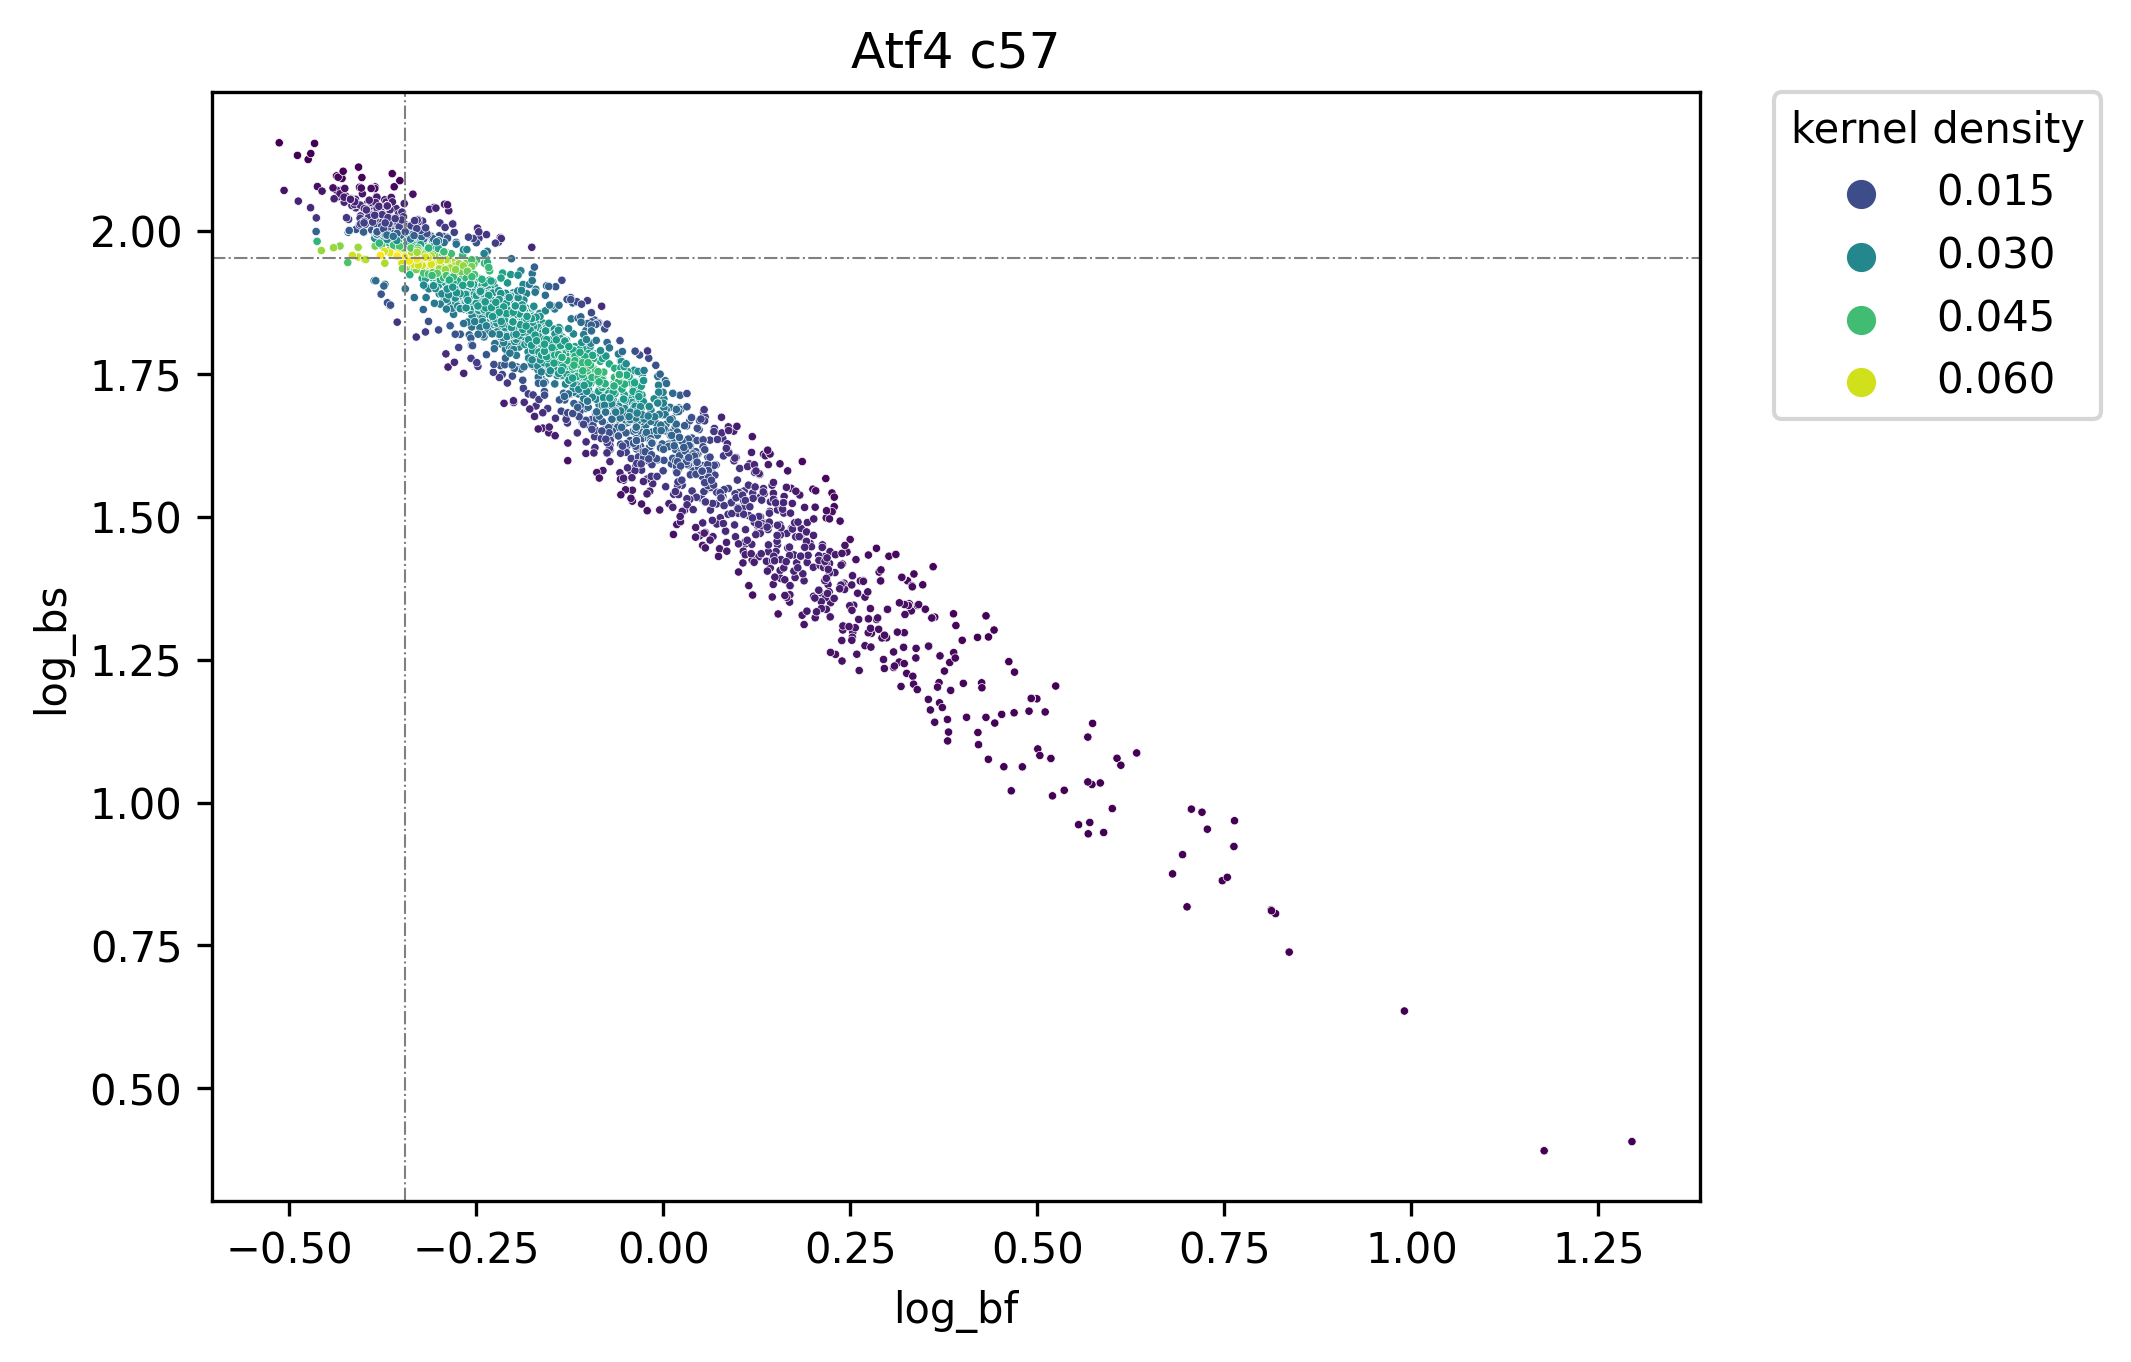

In [30]:
plot_kde(df, bs="log_bs", bf="log_bf", title="Atf4 c57", dot_size=4, save="Atf4_c57_kde.png")